# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import linear_model

# Reading and preparing data

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [5]:
cdf = df[['High','Low','Open','Volume','Close']]
cdf.head(10)

,High,Low,Open,Volume,Close
0,25.000000,17.540001,19.000000,18766300,23.889999
1,30.420000,23.299999,25.790001,17187100,23.830000
2,25.920000,20.270000,25.000000,8218800,21.959999
3,23.100000,18.709999,23.000000,5139800,19.200001
4,20.000000,15.830000,20.000000,6866900,16.110001
5,16.629999,14.980000,16.400000,6921700,15.800000
6,17.520000,15.570000,16.139999,7711400,17.459999
7,17.900000,16.549999,17.580000,4050600,17.400000
8,18.070000,17.000000,17.950001,2202500,17.049999
9,18.639999,16.900000,17.389999,2680100,18.139999


# Linear regression

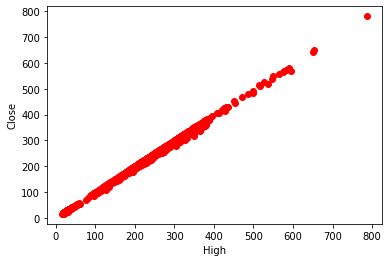

In [9]:
plt.scatter(cdf.High,cdf.Close,color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

# train and test spliting

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

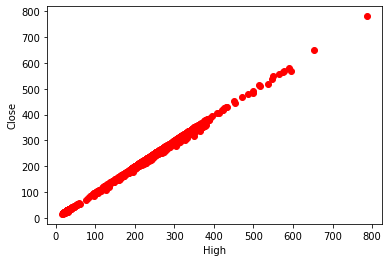

In [11]:
plt.scatter(train.High,train.Close,color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

# Model 

In [12]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['High','Low','Open','Volume']])
y = np.asanyarray(train[['Close']])
regr.fit(x,y)
print('Coefficients:', regr.coef_)

Coefficients: [[ 9.04181416e-01  7.68034752e-01 -6.72905933e-01 -2.38857715e-08]]


# predict

In [14]:
y_hat = regr.predict(test[['High','Low','Open','Volume']])
x = np.asanyarray(test[['High','Low','Open','Volume']])
y = np.asanyarray(test[['Close']])
print('Residual sum of squares: %.2f' %np.mean((y_hat - y)**2))
print('Variance score: %.2f' %regr.score(x,y))

Residual sum of squares: 4.03
Variance score: 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [15]:
print(y_hat)

[[ 16.56938547]
 [ 16.70457256]
 [ 16.9192906 ]
 [ 21.69583797]
 [ 20.99118122]
 [ 20.57558828]
 [ 20.76031556]
 [ 19.84355721]
 [ 17.9469752 ]
 [ 19.59371097]
 [ 19.4556357 ]
 [ 21.03477592]
 [ 20.52638864]
 [ 21.23427648]
 [ 21.13821619]
 [ 20.33619766]
 [ 20.16638731]
 [ 21.46451928]
 [ 21.08900254]
 [ 28.97361839]
 [ 30.01139629]
 [ 30.80238818]
 [ 34.79774313]
 [ 34.40278792]
 [ 31.25156365]
 [ 25.84612233]
 [ 27.02879312]
 [ 26.33382705]
 [ 27.30521988]
 [ 26.89453461]
 [ 24.15925397]
 [ 23.13496011]
 [ 24.35132244]
 [ 24.30227795]
 [ 23.91982418]
 [ 22.19797188]
 [ 23.41219775]
 [ 21.91809381]
 [ 22.8432107 ]
 [ 25.62393058]
 [ 25.85456599]
 [ 26.57100435]
 [ 26.07881867]
 [ 26.9959075 ]
 [ 27.25479816]
 [ 27.6983705 ]
 [ 27.21479753]
 [ 29.14234103]
 [ 27.85409176]
 [ 27.4911764 ]
 [ 29.08130301]
 [ 28.47028596]
 [ 27.83825622]
 [ 26.80485583]
 [ 28.02018202]
 [ 23.56942323]
 [ 25.46877264]
 [ 26.71625667]
 [ 24.94667397]
 [ 22.83884667]
 [ 23.11483856]
 [ 26.20629372]
 [ 25.22

# Checking how the model works

In [18]:
y1 = y.flatten()
y_hat1 = y_hat.flatten()

In [19]:
df2 = pd.DataFrame({'Actual':y1, 'Predicted':y_hat1})
df2.head()

,Actual,Predicted
0,16.110001,16.569385
1,17.459999,16.704573
2,17.400000,16.919291
3,21.910000,21.695838
4,21.000000,20.991181


In [20]:
graph = df2.head(20)

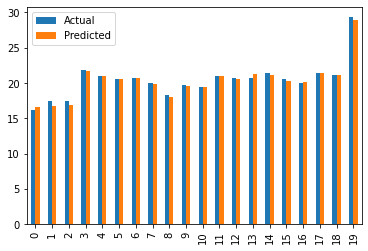

In [21]:
graph.plot(kind='bar')